In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

In [2]:
flatui

[(0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.5843137254901961, 0.6470588235294118, 0.6509803921568628),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.20392156862745098, 0.28627450980392155, 0.3686274509803922),
 (0.1803921568627451, 0.8, 0.44313725490196076)]

In [3]:
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("FIFA_data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 89)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [10]:
type(df.columns)

pandas.core.indexes.base.Index

In [11]:
df.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


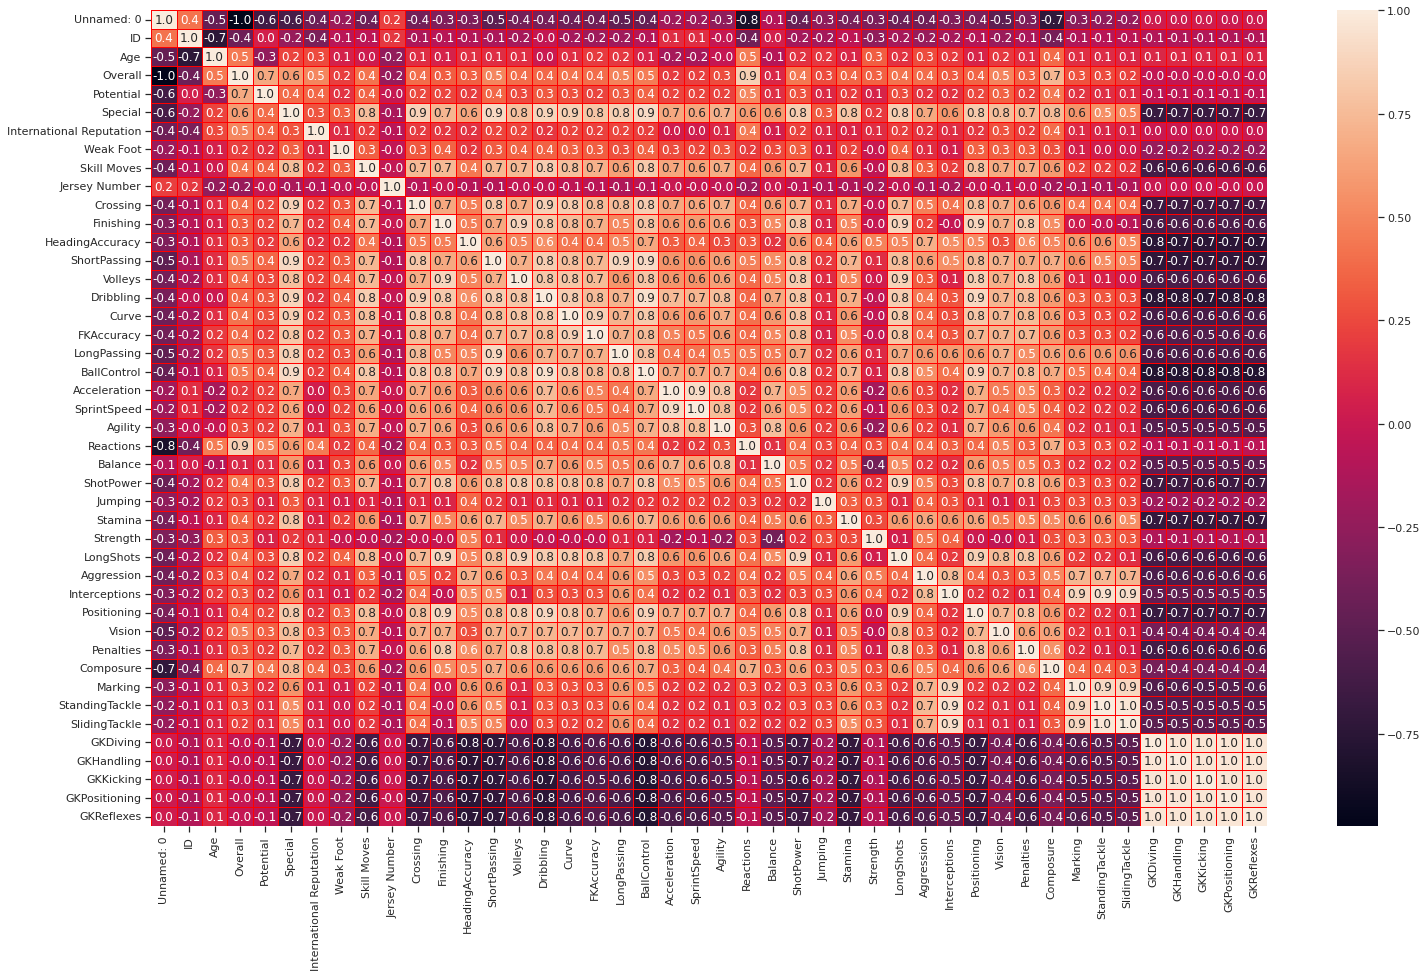

In [12]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(ax=ax, data=df.corr(), annot=True, fmt=".1f", linecolor="red", linewidths=0.5)
plt.show()

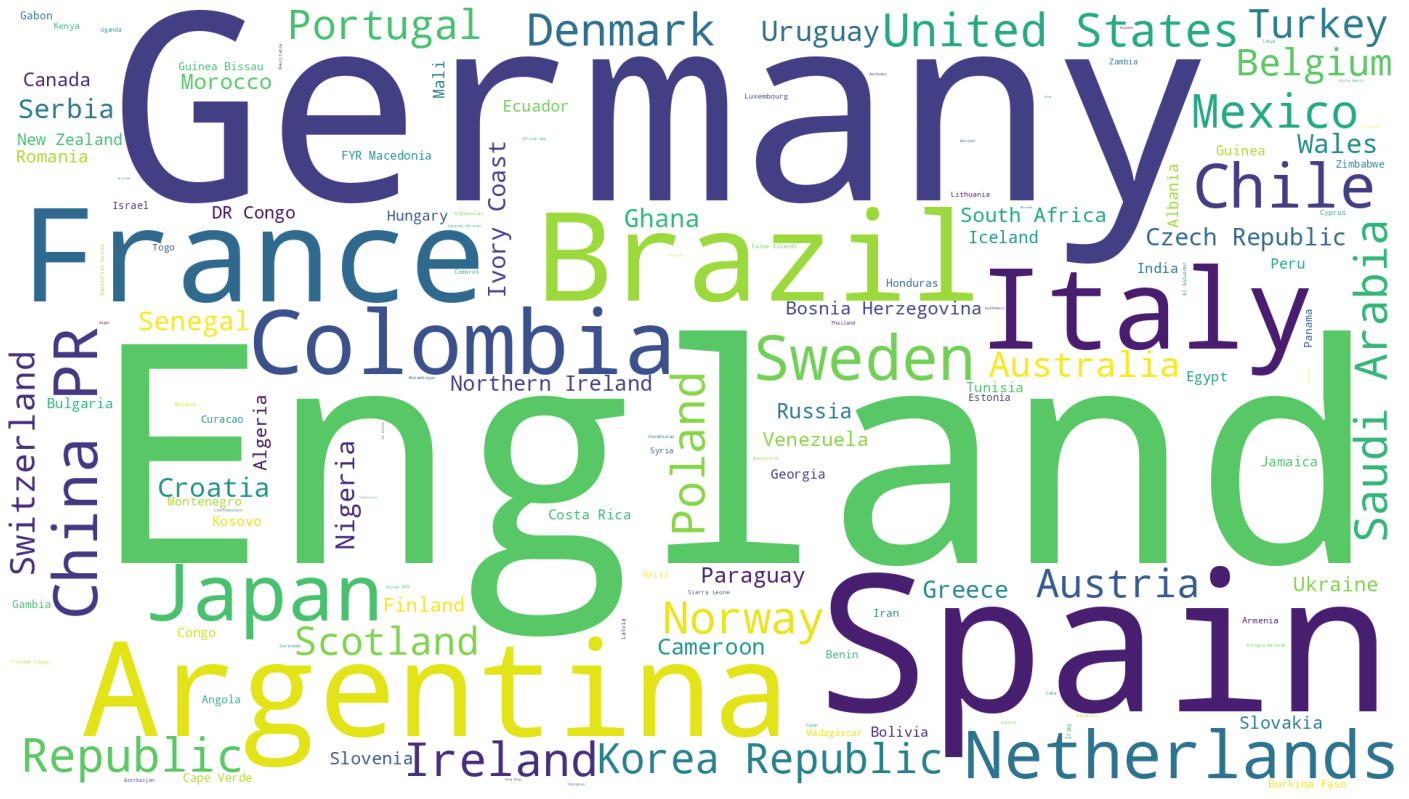

In [13]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
    background_color="white",
    width=1920,
    height=1080,
).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("test1.png")
plt.show()

In [14]:
df.Club.fillna("No Club", inplace=True)

In [15]:
df.Position.fillna("ST", inplace=True)

In [16]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [17]:
to_impute_by_mean = ['Crossing', 'Finishing', 'HeadingAccuracy',
                     'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                     'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                     'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                     'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                     'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                     'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                     'GKKicking', 'GKPositioning', 'GKReflexes']

for column in to_impute_by_mean:
    df[column].fillna(df[column].mean(), inplace=True)

In [18]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [19]:
to_impute_by_mode = ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']
for column in to_impute_by_mode:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
to_impute_by_median = ['Weak Foot', 'Skill Moves']
for column in to_impute_by_median:
    df[column].fillna(df[column].median(), inplace=True)

In [21]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [22]:
df.columns[df.isnull().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [23]:
df.columns[df.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [24]:
df.fillna(0, inplace=True)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
# functions to get the rounded values from different columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))


In [26]:
df.rename(columns={"Club Logo":"Club_Logo"}, inplace=True)

In [27]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [28]:
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [29]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


In [30]:
players = df[['Name','Defending','General','Mental','Passing',
              'Mobility','Power','Rating','Shooting','Flag','Age',
              'Nationality', 'Photo', 'Club_Logo', 'Club']]
players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


In [31]:
players.shape

(18207, 15)

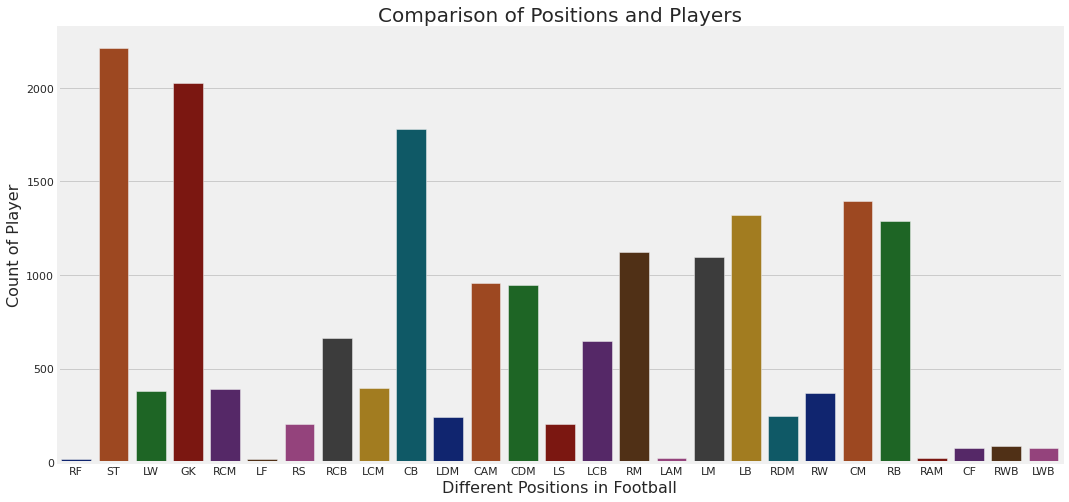

In [32]:
plt.figure(figsize=(18, 8))
plt.style.use("fivethirtyeight")
ax = sns.countplot("Position", data=df, palette="dark")
ax.set_xlabel("Different Positions in Football", fontsize=16)
ax.set_ylabel("Count of Player", fontsize=16)
ax.set_title("Comparison of Positions and Players", fontsize=20)
plt.show()

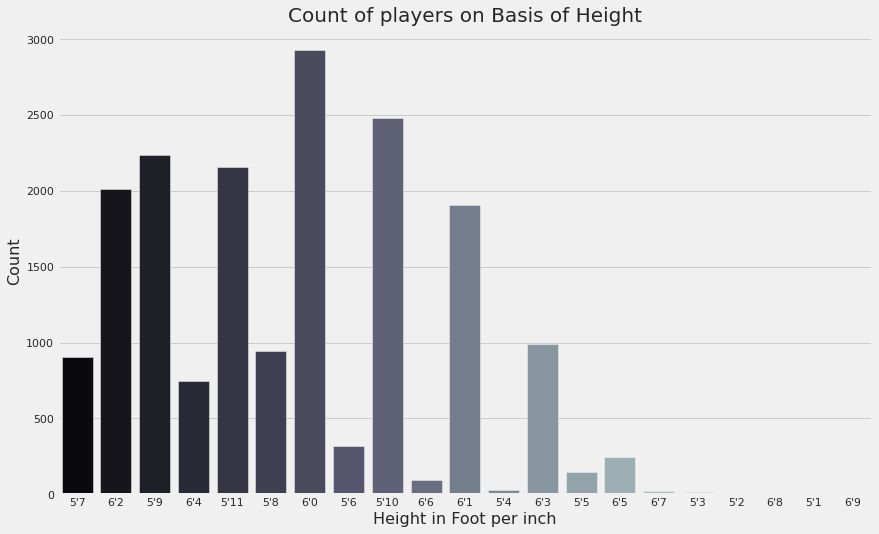

In [33]:
# plotting count of players based on their heights
plt.figure(figsize=(13, 8))
ax = sns.countplot("Height", data=df, palette="bone")
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

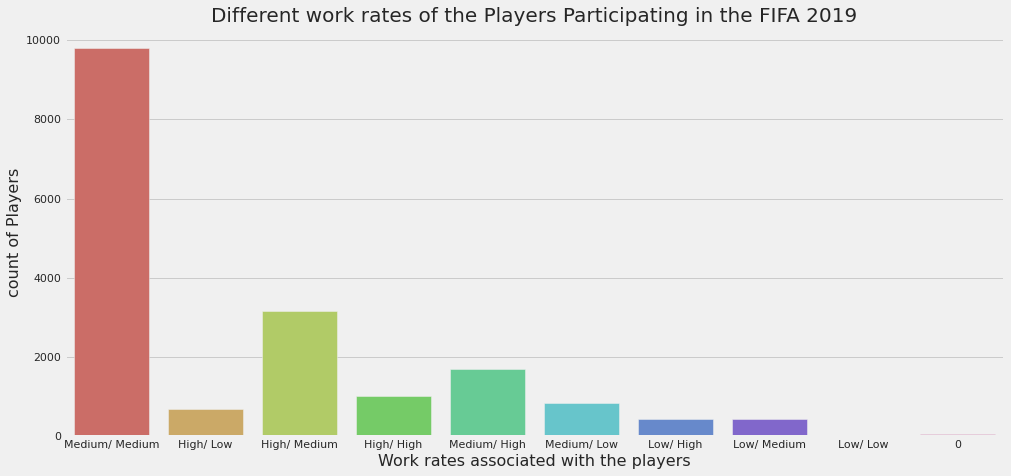

In [34]:
plt.figure(figsize = (15, 7))
sns.countplot('Work Rate', data = df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

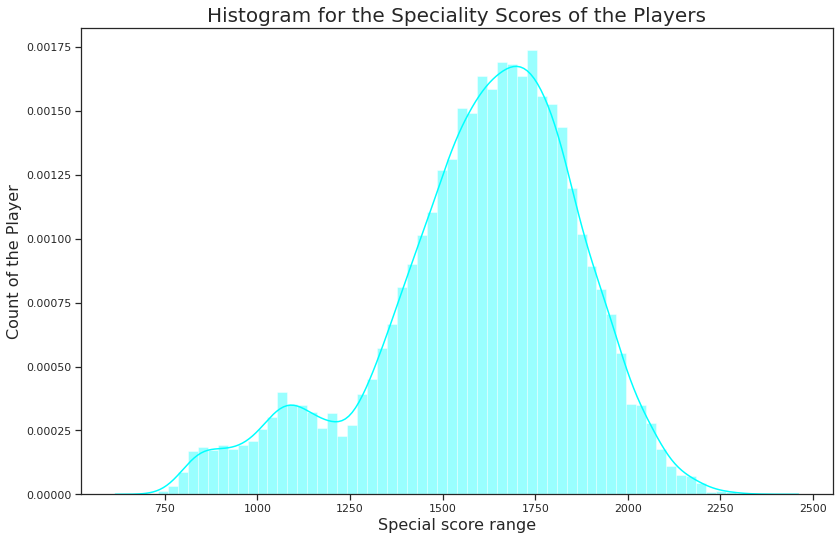

In [57]:
plt.figure(figsize=(12, 8))
plt.style.use("tableau-colorblind10")

ax = sns.distplot(df.Special, bins=60, kde=True, color="cyan")
ax.set_xlabel("Special score range", fontsize=16)
ax.set_ylabel("Count of the Player", fontsize=16)
ax.set_title("Histogram for the Speciality Scores of the Players", fontsize=20)
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      18207 non-null  object 
 10  Club_Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [37]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = df[(df.Nationality.isin(some_countries)) & (df["Overall"])]
data_countries.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61
15,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,8.0,€153.5M,21,85,67,81,87,76,92,86
16,16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,...,11.0,€160.7M,43,82,75,79,76,80,90,85


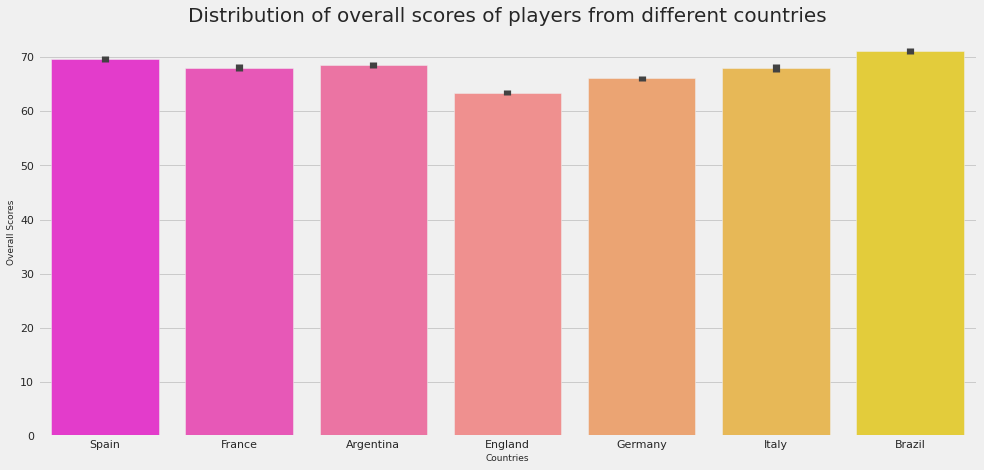

In [38]:
plt.rcParams["figure.figsize"] = (15, 7)
ax = sns.barplot(x=data_countries.Nationality, y=data_countries.Overall, palette="spring")
ax.set_xlabel("Countries", fontsize=9)
ax.set_ylabel("Overall Scores", fontsize=9)
ax.set_title("Distribution of overall scores of players from different countries", fontsize=20)
plt.show()

In [39]:
df.Club.value_counts().head()

No Club         241
FC Barcelona     33
Burnley          33
AS Monaco        33
Everton          33
Name: Club, dtype: int64

In [40]:
plt.style.use("fivethirtyeight")
sns.set(style="ticks")

In [41]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = df[df.Club.isin(some_clubs) & df.Overall]
data_club.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,8.0,€172.1M,28,83,72,84,92,75,91,82
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,9.0,€137.4M,70,81,80,89,84,77,91,78
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,37.0,€164M,48,85,78,74,84,81,91,87
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61


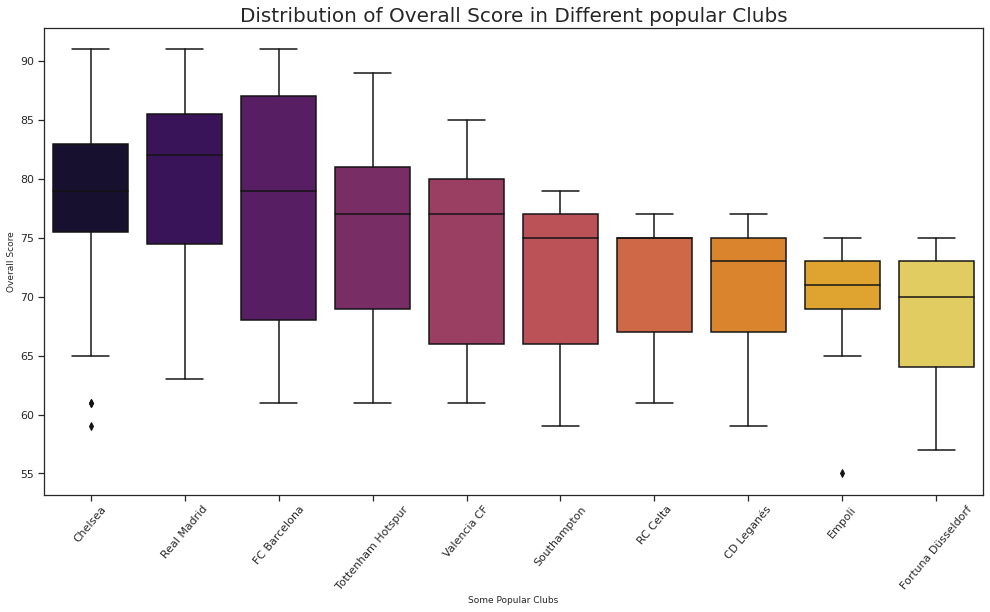

In [42]:
plt.rcParams["figure.figsize"] = (15, 8)
ax = sns.boxplot(x=data_club["Club"], y=data_club["Overall"], palette="inferno")
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

In [43]:
df[df["Preferred Foot"] == "Left"][["Name", "Club"]].head(10)

,Name,Club
0,L. Messi,FC Barcelona
13,David Silva,Manchester City
15,P. Dybala,Juventus
17,A. Griezmann,Atlético Madrid
19,T. Courtois,Real Madrid
24,G. Chiellini,Juventus
26,M. Salah,Liverpool
28,J. Rodríguez,FC Bayern München
35,Marcelo,Real Madrid
36,G. Bale,Real Madrid


In [44]:
df[df["Preferred Foot"] == "Right"][["Name", "Club"]].head(10)

,Name,Club
1,Cristiano Ronaldo,Juventus
2,Neymar Jr,Paris Saint-Germain
3,De Gea,Manchester United
4,K. De Bruyne,Manchester City
5,E. Hazard,Chelsea
6,L. Modrić,Real Madrid
7,L. Suárez,FC Barcelona
8,Sergio Ramos,Real Madrid
9,J. Oblak,Atlético Madrid
10,R. Lewandowski,FC Bayern München


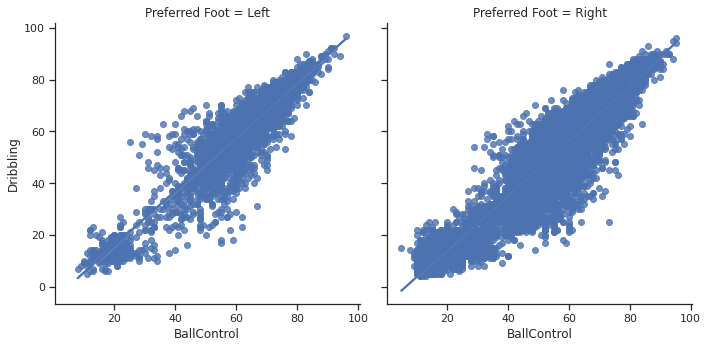

In [45]:
sns.lmplot(x="BallControl", y="Dribbling", data=df, col="Preferred Foot")

In [46]:
df.groupby(df["Club"])["Nationality"].nunique().sort_values(ascending=False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

In [47]:
df.groupby(df["Club"])["Nationality"].nunique().sort_values(ascending=True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [48]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [49]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [50]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,13.0,€196.4M,59,79,81,92,81,76,92,85


In [51]:
df.loc[df.Potential.idxmax()]["Name"]

'K. Mbappé'

In [52]:
df.loc[df.Overall.argmax()]["Name"]

'L. Messi'

In [53]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

for rec in pr_cols:
    print("Best of {}: {}".format(rec, df.loc[df[rec].argmax()]["Name"]))

Best of Crossing: K. De Bruyne
Best of Finishing: L. Messi
Best of HeadingAccuracy: Naldo
Best of ShortPassing: L. Modrić
Best of Volleys: E. Cavani
Best of Dribbling: L. Messi
Best of Curve: Quaresma
Best of FKAccuracy: L. Messi
Best of LongPassing: T. Kroos
Best of BallControl: L. Messi
Best of Acceleration: Douglas Costa
Best of SprintSpeed: K. Mbappé
Best of Agility: Neymar Jr
Best of Reactions: Cristiano Ronaldo
Best of Balance: Bernard
Best of ShotPower: Cristiano Ronaldo
Best of Jumping: Cristiano Ronaldo
Best of Stamina: N. Kanté
Best of Strength: A. Akinfenwa
Best of LongShots: L. Messi
Best of Aggression: B. Pearson
Best of Interceptions: N. Kanté
Best of Positioning: Cristiano Ronaldo
Best of Vision: L. Messi
Best of Penalties: M. Balotelli
Best of Composure: L. Messi
Best of Marking: A. Barzagli
Best of StandingTackle: G. Chiellini
Best of SlidingTackle: Sergio Ramos
Best of GKDiving: De Gea
Best of GKHandling: J. Oblak
Best of GKKicking: M. Neuer
Best of GKPositioning: G. 

In [54]:
df["Real Face"]

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
18202     No
18203     No
18204     No
18205     No
18206     No
Name: Real Face, Length: 18207, dtype: object

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

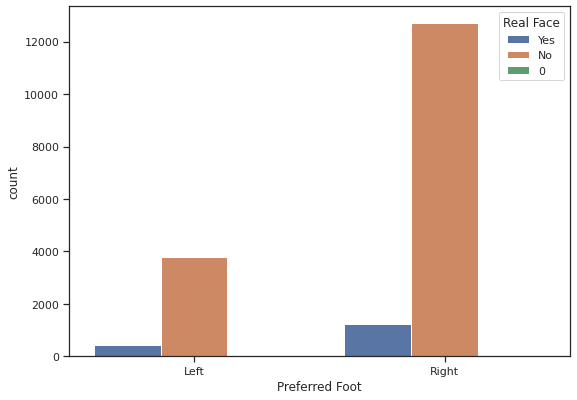

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=df, hue="Real Face")

In [56]:
df.loc[df.Potential.argmax()]["Name"]

'K. Mbappé'

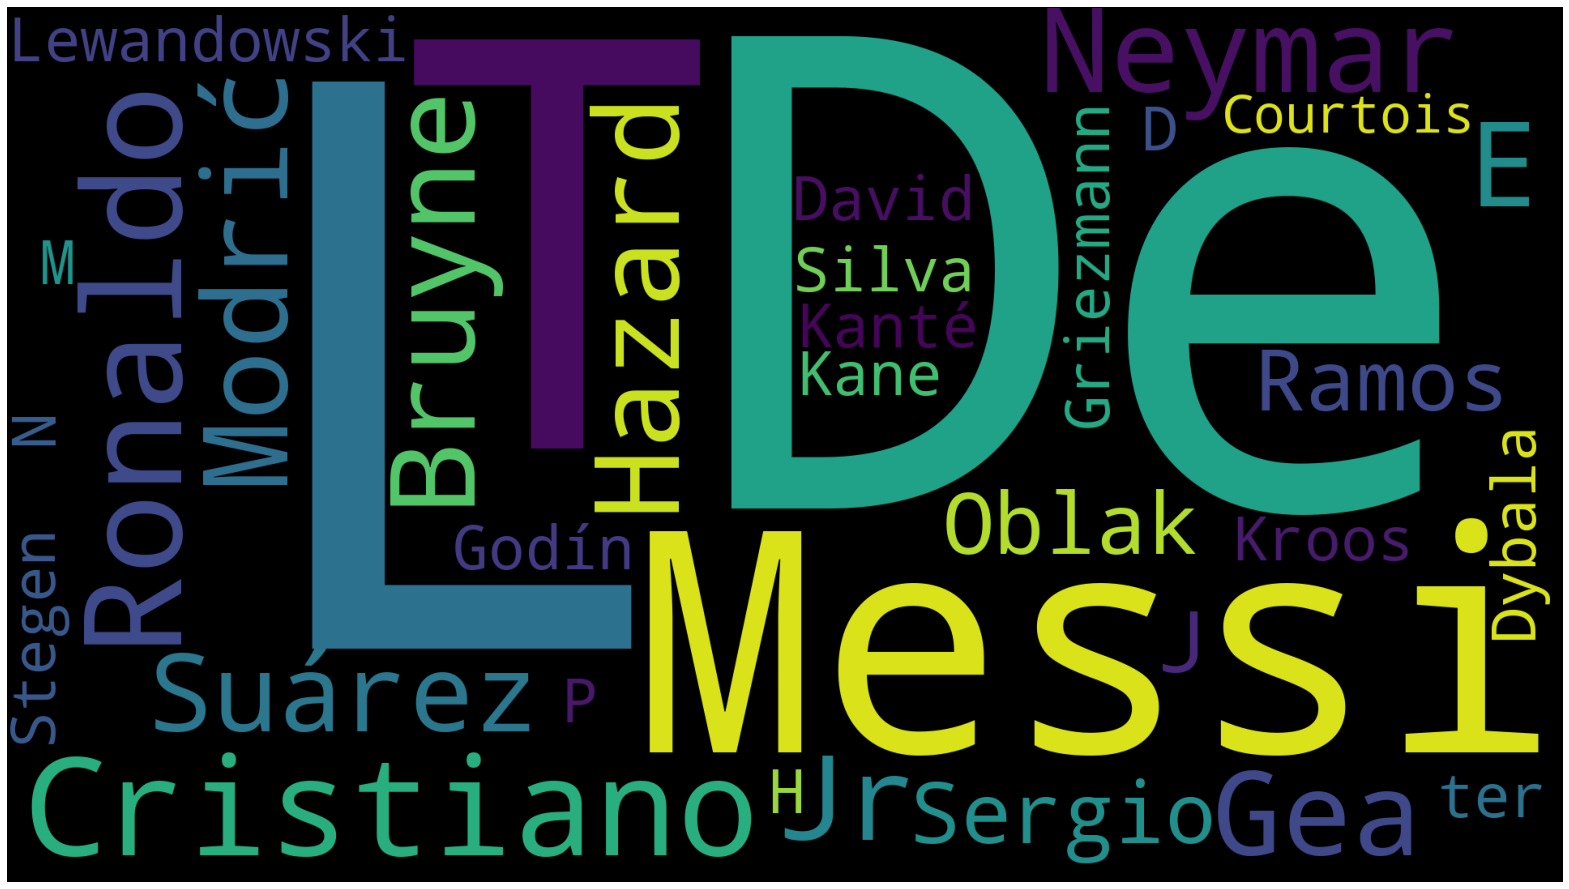

In [63]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color="black",
                     width=1920,
                     height=1080,
                     ).generate(" ".join(df.Name[0:20]))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("players.png")
plt.show()

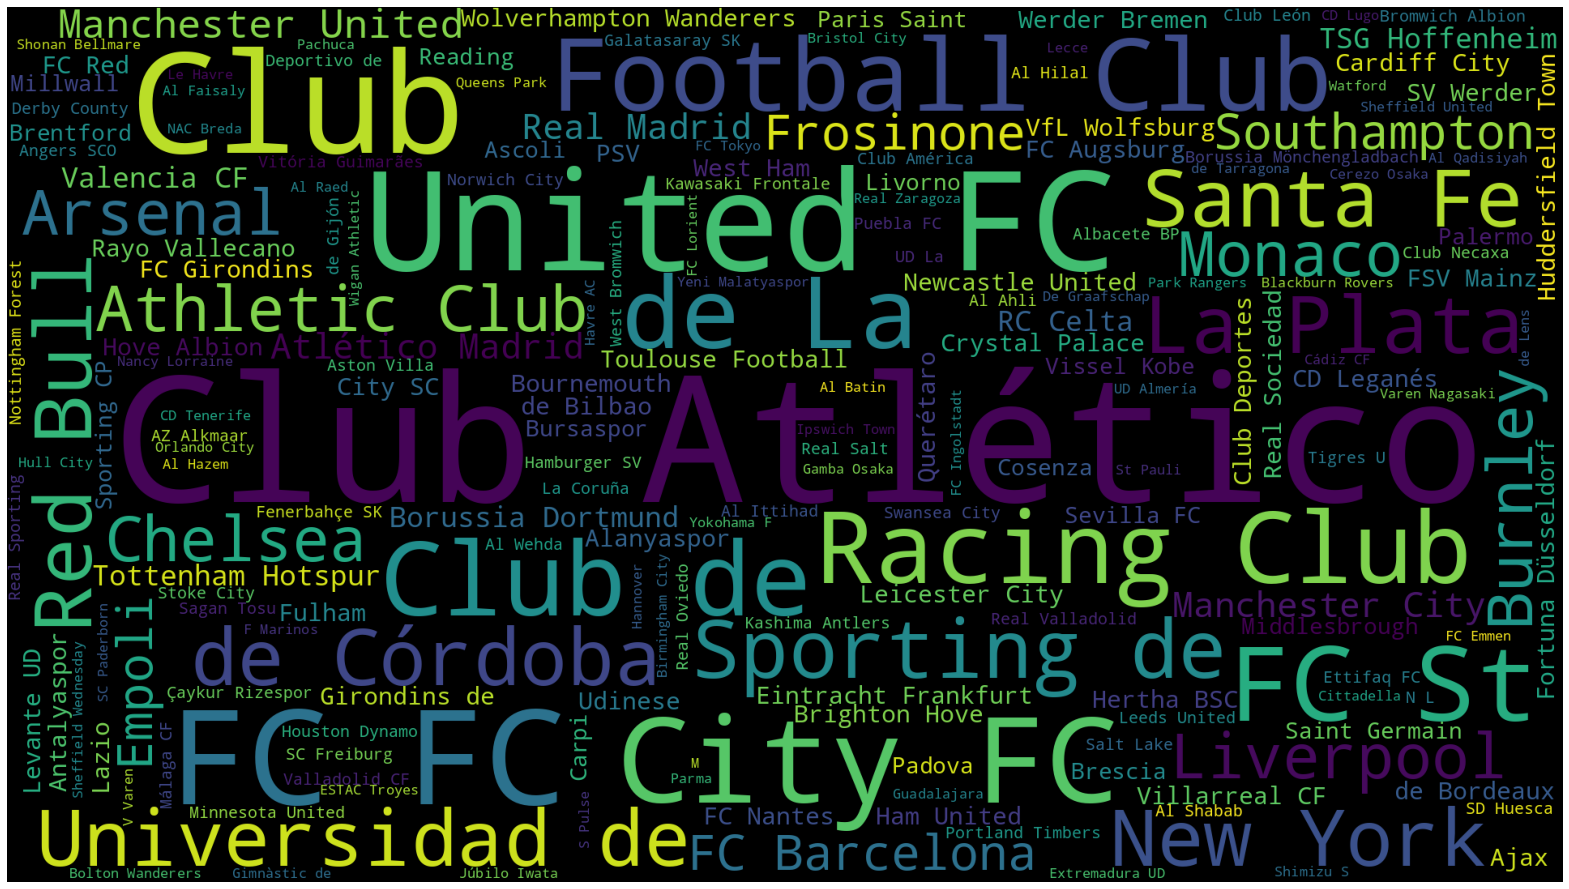

In [68]:
plt.subplots(figsize=(25, 15))
wordcloud = WordCloud(
    background_color="black",
    width=1920,
    height=1080).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("players.png")
plt.show()

In [73]:
df.Club.value_counts()

No Club                      241
FC Barcelona                  33
Burnley                       33
AS Monaco                     33
Everton                       33
                            ... 
América FC (Minas Gerais)     20
Fluminense                    20
Sligo Rovers                  19
Limerick FC                   19
Derry City                    18
Name: Club, Length: 652, dtype: int64

In [143]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def show_details(data, title, img, age, nationality, photo, logo, club):
    
    flag_img = "flag.jpg"
    player_img = "player.jpg"
    logo_img = "logo.jpg"
    
    try:
        flag = requests.get(img).content
    except:
        flag = requests.get("https://sirv.sirv.com/website/img/Paul%20Boag%20Smashing%20Magazine%20Director.jpg?cw=100.0000%25&ch=100.0000%25&scale.option=fill&w=200&h=0").content
    with open(flag_img, "wb") as handler:
        handler.write(flag)
        
    try:
        player = requests.get(photo).content
    except:
        player = requests.get("https://www.seekpng.com/png/full/356-3562377_personal-user.png").content
    with open(player_img, "wb") as handler:
        handler.write(player)
    
    try:
        logo = requests.get(logo).content
    except:
        logo = requests.get("https://www.seekpng.com/png/full/356-3562377_personal-user.png").content
    with open(logo_img, "wb") as handler:
        handler.write(logo)
        
    r = lambda: random.randint(0, 255)
    colorRandom = "#%02X%02X%02F" % (r(), r(), r())
    
    if colorRandom == "#ffffff": colorRandom = "#BCC047"
        
    basic_color = "#37474f"
    color_annotate = "#01579b"
    
    print(logo)
    
    img = mpimg.imread(flag)
    
#     plt.figure(figsize=(15, 8))
#     categories = list(players)[1:]
#     columnDontUseGraph = ["Flag", "Age", "Nationality", "Photo", "Logo", "Club"]
#     N = len(categories) - len(coulumnDontUseGraph)
    
    
    


In [144]:
# defining a method to show the leading performers
def graphPolar(id = 0):
    if 0 <= id < len(df.ID):
        show_details(data = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                img = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

In [145]:
graphPolar(0)

b'<!DOCTYPE html><html lang="en"><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1"><title>404 Not Found</title><link href="https://fonts.googleapis.com/css?family=Montserrat:500" rel="stylesheet"><link href="https://fonts.googleapis.com/css?family=Titillium+Web:700,900" rel="stylesheet"><style type="text/css">* {-webkit-box-sizing: border-box;box-sizing: border-box;}body {padding: 0;margin: 0;}#notfound {position: relative;height: 100vh;}#notfound .notfound {position: absolute;left: 50%;top: 50%;-webkit-transform: translate(-50%, -50%);-ms-transform: translate(-50%, -50%);transform: translate(-50%, -50%);}.notfound {max-width: 767px;width: 100%;line-height: 1.4;padding: 0px 15px;}.notfound .notfound-404 {position: relative;height: 150px;line-height: 150px;margin-bottom: 25px;}.notfound .notfound-404 h1 {font-family: \'Titillium Web\', sans-serif;font-size: 186px;font-weight: 900;margin: 0

FileNotFoundError: [Errno 2] No such file or directory: b'<!DOCTYPE html><html lang="en"><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1"><title>404 Not Found</title><link href="https://fonts.googleapis.com/css?family=Montserrat:500" rel="stylesheet"><link href="https://fonts.googleapis.com/css?family=Titillium+Web:700,900" rel="stylesheet"><style type="text/css">* {-webkit-box-sizing: border-box;box-sizing: border-box;}body {padding: 0;margin: 0;}#notfound {position: relative;height: 100vh;}#notfound .notfound {position: absolute;left: 50%;top: 50%;-webkit-transform: translate(-50%, -50%);-ms-transform: translate(-50%, -50%);transform: translate(-50%, -50%);}.notfound {max-width: 767px;width: 100%;line-height: 1.4;padding: 0px 15px;}.notfound .notfound-404 {position: relative;height: 150px;line-height: 150px;margin-bottom: 25px;}.notfound .notfound-404 h1 {font-family: \'Titillium Web\', sans-serif;font-size: 186px;font-weight: 900;margin: 0px;text-transform: uppercase;background: url(\'//cdn.sofifa.net/img/text.png\');-webkit-background-clip: text;-webkit-text-fill-color: transparent;background-size: cover;background-position: center;}.notfound h2 {font-family: \'Titillium Web\', sans-serif;font-size: 26px;font-weight: 700;margin: 0;}.notfound p {font-family: \'Montserrat\', sans-serif;font-size: 14px;font-weight: 500;margin-bottom: 0px;text-transform: uppercase;}.notfound a {font-family: \'Titillium Web\', sans-serif;display: inline-block;text-transform: uppercase;color: #fff;text-decoration: none;border: none;background: #5c91fe;padding: 10px 40px;font-size: 14px;font-weight: 700;border-radius: 1px;margin-top: 15px;-webkit-transition: 0.2s all;transition: 0.2s all;}.notfound a:hover {opacity: 0.8;}@media only screen and (max-width: 767px) {.notfound .notfound-404 {height: 110px;line-height: 110px;}.notfound .notfound-404 h1 {font-size: 120px;}}</style><!--[if lt IE 9]><script src="https://oss.maxcdn.com/html5shiv/3.7.3/html5shiv.min.js"></script><script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script><![endif]--></head><body><div id="notfound"><div class="notfound"><div class="notfound-404"><h1>404</h1></div><h2>Oops! This Page Could Not Be Found</h2><p>Sorry but the page you are looking for does not exist, have been removed. name changed or is temporarily unavailable</p><a href="https://sofifa.com/">Go To Homepage</a></div></div></body></html>'

In [139]:
players["Photo"][0]


'https://cdn.sofifa.org/players/4/19/158023.png'